[Credit Card Fraud Detection](https://www.kaggle.com/dalpozz/creditcardfraud)

In [340]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",101)
RANDOM_STATE = 42

In [341]:
def get_fraud_data():
    fraud_data = pd.read_csv("fraud/creditcard.csv")
    return fraud_data

In [342]:
fraud_data = get_fraud_data()

In [4]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**大部分参数已经处理Stanardalize，处理下Amount，并且先取出Time**

In [79]:
def make_X(fraud_data):
    from sklearn.preprocessing import StandardScaler
    X = fraud_data.drop(['Class', 'Time'], axis=1)
    X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))
    y = fraud_data['Class']
    return X, y

In [80]:
X, y = make_X(fraud_data)

In [7]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


#### 采样方法
1. undersampling
2. oversampling
3. smot
4. easyensemble

In [82]:
def get_stratified_train_test(X, y, n_splits=1, test_size=0.2, random_state=None):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
    return X_train, y_train, X_test, y_test

#### Under_Sampling

In [107]:
X_train, y_train, X_test, y_test = get_stratified_train_test(X, y, random_state=42)
    
def undersampling_data(X, y, fraud_data):
    fraud_index = y.ix[fraud_data.Class == 1].index
    normal_index = y.ix[fraud_data.Class == 0].index
    fraud_index = y.ix[y == 1].index
    normal_index = y.ix[y == 0].index
    number_fraud = len(fraud_index)
    random_normal_index = np.random.choice(normal_index, number_fraud, replace=False)
    
    sampling_index = np.concatenate([random_normal_index, fraud_index])
    return X.ix[sampling_index], y.ix[sampling_index]

us_X, us_y = undersampling_data(X_train, y_train, fraud_data)

In [12]:
us_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
168351,-1.272339,0.628670,2.139238,0.615673,0.157444,0.484832,0.163036,-0.675896,0.366892,-0.963122,-1.588561,0.849148,0.946690,-0.936684,-1.698784,-0.674207,0.007148,-0.041003,-0.163446,-0.274968,1.000781,0.925249,-0.620613,0.004955,1.145127,-0.138879,0.217995,0.040068,-0.137333
137880,1.302441,-0.915717,0.863774,-0.655421,-1.226141,0.250067,-1.206210,0.208373,-0.010749,0.460484,-0.884630,-0.849110,-0.312357,-0.558487,0.708902,1.096059,0.440239,-1.384154,0.383859,0.069596,0.158873,0.455994,-0.059103,-0.440669,0.301421,-0.139741,0.055741,0.022235,-0.213296
83663,-0.111272,0.692420,2.408567,2.054627,-0.624867,0.046163,0.202088,-0.048570,-0.640990,0.763530,-0.660638,-1.357242,-1.200176,0.033301,1.832069,0.404995,-0.115784,0.371248,0.883361,0.227956,0.034094,0.151717,0.077545,0.374995,-0.987603,0.993525,-0.058671,-0.064158,-0.201062
267067,-0.765962,0.628565,-1.207354,-0.329153,1.795329,1.073562,3.144639,-0.479146,-1.001552,-0.578898,-0.483692,-0.022025,0.018455,0.507490,-0.217129,-1.541532,0.096032,-1.762641,-2.045817,-0.266315,0.418743,1.639313,-0.101362,-0.375745,0.467971,-0.323795,-0.006041,-0.160090,0.741607
30853,1.041263,-0.186385,0.145037,0.531031,-0.360830,-0.497842,0.115160,-0.053236,-0.132054,0.082855,1.034885,0.557389,-0.439356,0.609859,0.340305,0.542483,-0.703918,0.174414,0.278401,0.096094,-0.116506,-0.630433,-0.059008,-0.008088,0.272344,0.167444,-0.063567,0.018764,0.080483


In [13]:
us_y.value_counts()

1    492
0    492
Name: Class, dtype: int64

#### 评判标准：AUC图

In [98]:
from functools import wraps

def ct(f):
    import time
    @wraps(f)
    def wrapper(*args, **kwds):
        start_time = int(time.time())
        result = f(*args, **kwds)
        end_time = int(time.time())
        print "used time:{0} seconds".format(end_time - start_time)
        return result
    return wrapper

#### LR

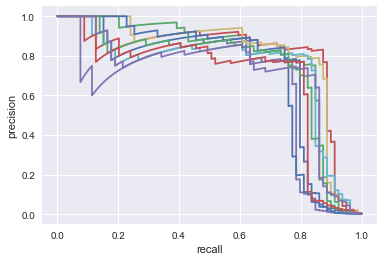

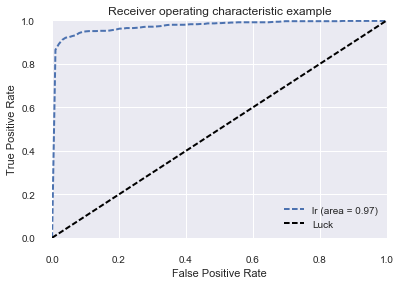

used time:11 seconds
roc_auc: 0.976466047167
f1score: 0.66265060241
precision: 0.808823529412
recall: 0.808823529412


In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from scipy import interp

@ct
def train_lr(X, y, plot_roc=False, penalty='l1'):
    n_splits = 10
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=10)
    lr = None
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lr = LogisticRegression(C=0.01, penalty=penalty)
        lr.fit(X_train, y_train)
        probas_ = lr.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        precision, recall, thresholds = precision_recall_curve(y_test, probas_[:, 1])
    
        plt.plot(recall, precision)
        plt.xlabel('recall')
        plt.ylabel('precision')
    
    if plot_roc:
        fig = plt.figure()
        LW = 2
        ax = fig.add_subplot(1, 1, 1)
        mean_tpr /= n_splits
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, linestyle='--',
        label='{} (area = %0.2f)'.format("lr") % mean_auc, lw=LW)     

        plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
                 label='Luck')

        # make nice plotting
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')

        plt.legend(loc="lower right")

        plt.show()
    
    return lr, precision, recall
        
lr, lr_precision, lr_recall = train_lr(X_train, y_train, plot_roc=True, penalty='l1')
y_predict = lr.predict(X_test)
y_predict_prob = lr.predict_proba(X_test)

print "roc_auc:", metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
print "f1score:", metrics.f1_score(y_test, y_predict)
print "precision:", metrics.precision_score(y_test, y_predict)
print "recall:", metrics.precision_score(y_test, y_predict)
# print ""
# columns = list(X_train.columns)
# plot_df = pd.DataFrame(lr.coef_.ravel(), index=columns)
# plot_df.plot(kind='bar')
# y_predict = lr.predict(X)
# print metrics.roc_auc_score(y, y_predict)
# print "precision:", metrics.precision_score(y, y_predict)
# print "recall:", metrics.recall_score(y, y_predict)
# print "f1score:", metrics.f1_score(y, y_predict)



#### EasyEnsebmle

In [16]:
#Select only the anonymized features.
v_features = fraud_data.ix[:,1:29].columns

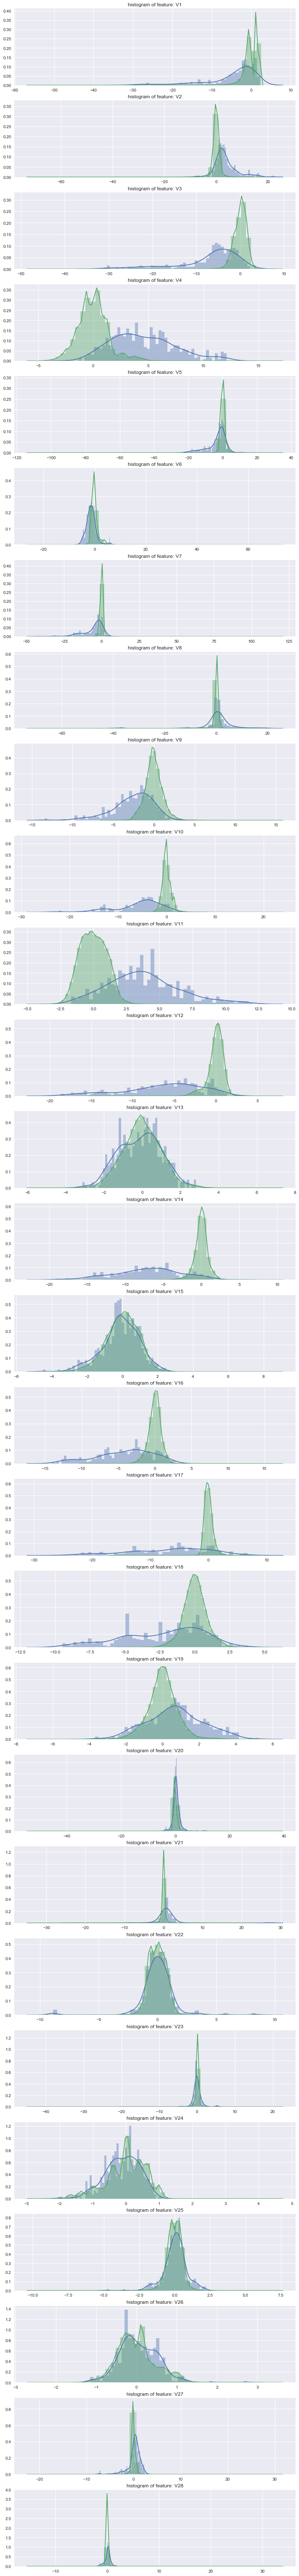

In [17]:
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(fraud_data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(fraud_data[cn][fraud_data.Class == 1], bins=50)
    sns.distplot(fraud_data[cn][fraud_data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [66]:
new_X = X_train.copy()
new_X['V1_'] = new_X.V1.map(lambda x: 1 if x < -3 else 0)
new_X['V2_'] = new_X.V2.map(lambda x: 1 if x > 2.5 else 0)
new_X['V3_'] = new_X.V3.map(lambda x: 1 if x < -4 else 0)
new_X['V4_'] = new_X.V4.map(lambda x: 1 if x > 2.5 else 0)
new_X['V5_'] = new_X.V5.map(lambda x: 1 if x < -4.5 else 0)
new_X['V6_'] = new_X.V6.map(lambda x: 1 if x < -2.5 else 0)
new_X['V7_'] = new_X.V7.map(lambda x: 1 if x < -3 else 0)
new_X['V9_'] = new_X.V9.map(lambda x: 1 if x < -2 else 0)
new_X['V10_'] = new_X.V10.map(lambda x: 1 if x < -2.5 else 0)
new_X['V11_'] = new_X.V11.map(lambda x: 1 if x > 2 else 0)
new_X['V12_'] = new_X.V12.map(lambda x: 1 if x < -2 else 0)
new_X['V14_'] = new_X.V14.map(lambda x: 1 if x < -2.5 else 0)
new_X['V16_'] = new_X.V16.map(lambda x: 1 if x < -2 else 0)
new_X['V17_'] = new_X.V17.map(lambda x: 1 if x < -2 else 0)
new_X['V18_'] = new_X.V18.map(lambda x: 1 if x < -2 else 0)
new_X['V19_'] = new_X.V19.map(lambda x: 1 if x > 1.5 else 0)
new_X['V21_'] = new_X.V21.map(lambda x: 1 if x > 0.6 else 0)

In [19]:
new_X_test = X_test.copy()
new_X_test['V1_'] = new_X_test.V1.map(lambda x: 1 if x < -3 else 0)
new_X_test['V2_'] = new_X_test.V2.map(lambda x: 1 if x > 2.5 else 0)
new_X_test['V3_'] = new_X_test.V3.map(lambda x: 1 if x < -4 else 0)
new_X_test['V4_'] = new_X_test.V4.map(lambda x: 1 if x > 2.5 else 0)
new_X_test['V5_'] = new_X_test.V5.map(lambda x: 1 if x < -4.5 else 0)
new_X_test['V6_'] = new_X_test.V6.map(lambda x: 1 if x < -2.5 else 0)
new_X_test['V7_'] = new_X_test.V7.map(lambda x: 1 if x < -3 else 0)
new_X_test['V9_'] = new_X_test.V9.map(lambda x: 1 if x < -2 else 0)
new_X_test['V10_'] = new_X_test.V10.map(lambda x: 1 if x < -2.5 else 0)
new_X_test['V11_'] = new_X_test.V11.map(lambda x: 1 if x > 2 else 0)
new_X_test['V12_'] = new_X_test.V12.map(lambda x: 1 if x < -2 else 0)
new_X_test['V14_'] = new_X_test.V14.map(lambda x: 1 if x < -2.5 else 0)
new_X_test['V16_'] = new_X_test.V16.map(lambda x: 1 if x < -2 else 0)
new_X_test['V17_'] = new_X_test.V17.map(lambda x: 1 if x < -2 else 0)
new_X_test['V18_'] = new_X_test.V18.map(lambda x: 1 if x < -2 else 0)
new_X_test['V19_'] = new_X_test.V19.map(lambda x: 1 if x > 1.5 else 0)
new_X_test['V21_'] = new_X_test.V21.map(lambda x: 1 if x > 0.6 else 0)

roc_auc: 0.799824129441
f1score: 0.666666666667
precision: 0.75
recall: 0.75

roc_auc: 0.699824129441
f1score: 0.5
precision: 0.666666666667
recall: 0.666666666667

roc_auc: 0.69991206472
f1score: 0.533333333333
precision: 0.8
recall: 0.8

roc_auc: 0.749824129441
f1score: 0.588235294118
precision: 0.714285714286
recall: 0.714285714286

roc_auc: 0.74991206472
f1score: 0.625
precision: 0.833333333333
recall: 0.833333333333

roc_auc: 0.699648258881
f1score: 0.444444444444
precision: 0.5
recall: 0.5

roc_auc: 0.74991206472
f1score: 0.625
precision: 0.833333333333
recall: 0.833333333333

roc_auc: 0.59991206472
f1score: 0.307692307692
precision: 0.666666666667
recall: 0.666666666667

roc_auc: 0.749648258881
f1score: 0.526315789474
precision: 0.555555555556
recall: 0.555555555556

roc_auc: 0.59991206472
f1score: 0.307692307692
precision: 0.666666666667
recall: 0.666666666667



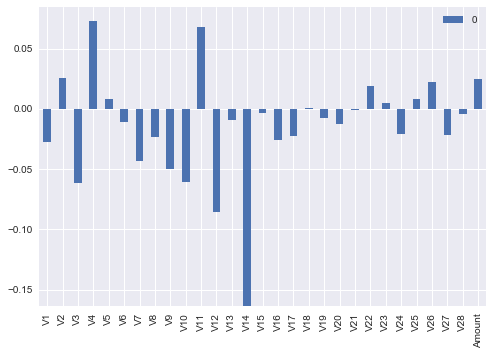

In [20]:
lr = train_lr(X_train, y_train, plot_roc=False, penalty='l2')
columns = list(X.columns)
plot_df = pd.DataFrame(lr.coef_.ravel(), index=columns)
plot_df.plot(kind='bar')

In [117]:
def make_easy_ensemble(X, y):
    from imblearn.ensemble import EasyEnsemble
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
    
    fraud_num = y.sum()
    normal_num = y.shape[0] - fraud_num
    n_subsets = normal_num / fraud_num
    print n_subsets
    ee = EasyEnsemble(n_subsets=n_subsets)
    sample_X, sample_y = ee.fit_sample(X, y)
    return sample_X, sample_y

sample_x, sample_y = make_easy_ensemble(X_train, y_train)

577


In [343]:
@ct
def train_easy_ensemble(x_iter, y_iter):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    abc_list = []
    cnt = 1
    for ee_X, ee_y in zip(x_iter, y_iter):
        if cnt % 10 == 1:
            print "sample:", cnt
        abc = AdaBoostClassifier(random_state=42)
    #    abc = GradientBoostingClassifier(n_estimators=50, max_depth=5)
        abc.fit(ee_X, ee_y)
        cnt += 1
        abc_list.append(abc)
        
    return abc_list

abc_list = train_easy_ensemble(sample_x, sample_y)

sample: 1
sample: 11
sample: 21
sample: 31
sample: 41


KeyboardInterrupt: 

#### 单个adboost_tree

In [317]:
predict_abc_y = abc_list[0].predict(X_test) 

In [318]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predict_abc_y))


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.94      0.93      0.97      0.16      0.03     56864
          1       0.03      0.93      0.94      0.05      0.16      0.02        98

avg / total       1.00      0.94      0.93      0.97      0.16      0.03     56962



#### 综合所有adboost_tree

In [127]:
def calc_prob(X, abc_list):
    predict_pro_list = []
    cnt = 1
    for estimator in abc_list:
        if cnt % 10 == 1:
            print cnt
        predict_pro_list.append(estimator.predict_proba(X))
        cnt += 1
    return predict_pro_list

prob_list = calc_prob(X_test, abc_list)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571


In [130]:
from sklearn.metrics import precision_recall_curve
predict_prob = sum(prob_list) / len(abc_list)

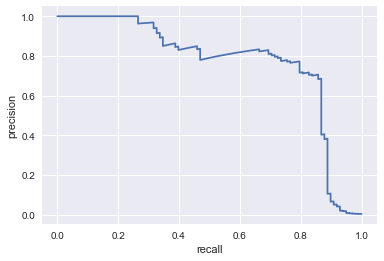

In [136]:
adboost_precision, adboost_recall, adboost_thresholds = precision_recall_curve(y_test, predict_prob[:, 1])
plt.plot(adboost_recall, adboost_precision)
plt.xlabel('recall')
plt.ylabel('precision')

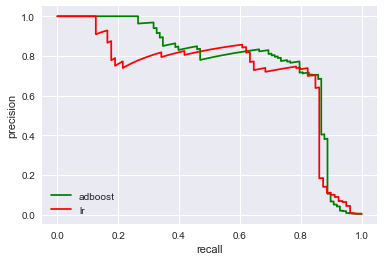

In [338]:
plt.plot(adboost_recall, adboost_precision, 'g', label='adboost')
plt.plot(lr_recall, lr_precision, 'r', label='lr')
plt.legend(loc='lower left')
plt.xlabel('recall')
plt.ylabel('precision')

**实现adboost**

In [264]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
class EnsembleModel(object):
    def __init__(self, rounds):
        self.trees = [None] * rounds
        self.alpha = [0] * rounds
        self.thresh = 0
        
    def __str__(self):
        return "len: {0}\nalpha:{1}\nthresh: {2}\ntrees:{3}".format(
            len(self.trees),
            self.alpha,
            self.thresh,
            self.trees
        )
    
def boost_data(X, y, weight):
    size = y.shape[0]
    index_list = np.linspace(0, size-1, size).astype(int)
    train_index = np.random.choice(index_list, size, p=weight)
    train_X = X[train_index, :]
    train_y = y[train_index]
    return train_X, train_y
        
def adboost(X, y, rounds):
    ensemble = EnsembleModel(rounds)
    
    # 初始化weight
    size = y.shape[0]
    weight = np.zeros(size)
    weight[y == 1] = float(1) / sum(y == 1)
    weight[y == 0] = float(1) / sum(y == 0)
    weight /= sum(weight)
    
    result = np.zeros(size)
    
    for i in xrange(rounds):
        train_X, train_y = boost_data(X, y, weight)
        dt = DecisionTreeClassifier()
        ensemble.trees[i] = dt
        
        dt.fit(train_X, train_y)
        y_predict = dt.predict(X)
#         print "sum:", sum(y_predict != y)
        train_error = sum(weight * (y_predict != y))
#         print "train:", train_error
        beta = (1 - train_error) / float(train_error)
        ensemble.alpha[i] = 0.5 * np.log(beta)
        weight *= np.exp(-ensemble.alpha[i] * (y -0.5) * (y - 0.5) * 4)
        weight /= sum(weight)
    
    ensemble.thresh = sum(ensemble.alpha) / 2
    return ensemble



In [ ]:
ensemble = adboost(us_X.as_matrix(), us_y.as_matrix(), 10)

In [254]:
xx = ensemble.alpha[0] * ensemble.trees[0].predict(X_test)

In [259]:
xx_r = xx > ensemble.thresh / len(ensemble.trees)

In [261]:
print metrics.precision_score(xx_r, y_test)
print metrics.recall_score(xx_r, y_test)

0.877551020408
0.0125346159452


In [344]:
round = 10

class EasyEnsemble(object):
    def __init__(self):
        self.trees = []
        self.alpha = []
        self.thresh = 0
        
    def __str__(self):
        return "len: {0}\nalpha:{1}\nthresh: {2}\ntrees:{3}".format(
            len(self.trees),
            self.alpha,
            self.thresh,
            self.trees
        )
    
    def eval(self, X):
        value = np.zeros(X.shape[0])
        for i in xrange(len(self.trees)):
            if i % 100 == 1:
                print "cnt(evaluate_value):", i
            value += self.alpha[i] * self.trees[i].predict(X)
        return value
    
    def __len__(self):
        return len(self.trees)

@ct
def make_easy_ensemble(X_iter, y_iter, round):
    cnt = 1
    final_easy_ensemble = EasyEnsemble()
    for X, y in zip(X_iter, y_iter):
        if cnt % 10 == 1:
            print "cnt(make_easy_ensembel):", cnt
        ensemble = adboost(X, y, round)
        final_easy_ensemble.trees.extend(ensemble.trees)
        final_easy_ensemble.alpha.extend(ensemble.alpha)
        
        cnt += 1
    
    final_easy_ensemble.thresh = sum(final_easy_ensemble.alpha) / 2
        
    return final_easy_ensemble

final_easy_ensemble = make_easy_ensemble(sample_x, sample_y, round)

cnt(make_easy_ensembel): 1
cnt(make_easy_ensembel): 11
cnt(make_easy_ensembel): 21
cnt(make_easy_ensembel): 31
cnt(make_easy_ensembel): 41
cnt(make_easy_ensembel): 51
cnt(make_easy_ensembel): 61
cnt(make_easy_ensembel): 71
cnt(make_easy_ensembel): 81
cnt(make_easy_ensembel): 91
cnt(make_easy_ensembel): 101
cnt(make_easy_ensembel): 111
cnt(make_easy_ensembel): 121
cnt(make_easy_ensembel): 131
cnt(make_easy_ensembel): 141
cnt(make_easy_ensembel): 151
cnt(make_easy_ensembel): 161
cnt(make_easy_ensembel): 171
cnt(make_easy_ensembel): 181
cnt(make_easy_ensembel): 191
cnt(make_easy_ensembel): 201
cnt(make_easy_ensembel): 211
cnt(make_easy_ensembel): 221
cnt(make_easy_ensembel): 231
cnt(make_easy_ensembel): 241
cnt(make_easy_ensembel): 251
cnt(make_easy_ensembel): 261
cnt(make_easy_ensembel): 271
cnt(make_easy_ensembel): 281
cnt(make_easy_ensembel): 291
cnt(make_easy_ensembel): 301
cnt(make_easy_ensembel): 311
cnt(make_easy_ensembel): 321
cnt(make_easy_ensembel): 331
cnt(make_easy_ensembel): 

**实现easy_ensemble**

In [311]:
value = final_easy_ensemble.eval(X_test)

cnt(evaluate_value): 1
cnt(evaluate_value): 101
cnt(evaluate_value): 201
cnt(evaluate_value): 301
cnt(evaluate_value): 401
cnt(evaluate_value): 501
cnt(evaluate_value): 601
cnt(evaluate_value): 701
cnt(evaluate_value): 801
cnt(evaluate_value): 901
cnt(evaluate_value): 1001
cnt(evaluate_value): 1101
cnt(evaluate_value): 1201
cnt(evaluate_value): 1301
cnt(evaluate_value): 1401
cnt(evaluate_value): 1501
cnt(evaluate_value): 1601
cnt(evaluate_value): 1701
cnt(evaluate_value): 1801
cnt(evaluate_value): 1901
cnt(evaluate_value): 2001
cnt(evaluate_value): 2101
cnt(evaluate_value): 2201
cnt(evaluate_value): 2301
cnt(evaluate_value): 2401
cnt(evaluate_value): 2501
cnt(evaluate_value): 2601
cnt(evaluate_value): 2701
cnt(evaluate_value): 2801
cnt(evaluate_value): 2901
cnt(evaluate_value): 3001
cnt(evaluate_value): 3101
cnt(evaluate_value): 3201
cnt(evaluate_value): 3301
cnt(evaluate_value): 3401
cnt(evaluate_value): 3501
cnt(evaluate_value): 3601
cnt(evaluate_value): 3701
cnt(evaluate_value): 380

In [301]:
print Counter(y_test)

Counter({0: 56864, 1: 98})


4756.41028702
Counter({False: 54786, True: 2176})
precision: 0.0413602941176
recall: 0.918367346939
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.92      0.98      0.20      0.05     56864
          1       0.04      0.92      0.96      0.08      0.20      0.04        98

avg / total       1.00      0.96      0.92      0.98      0.20      0.05     56962

roc_auc: 0.975681594036


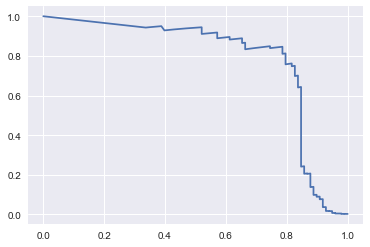

In [331]:
print final_easy_ensemble.thresh
result = value > final_easy_ensemble.thresh
print Counter(result)
print "precision:", metrics.precision_score(y_test, result)
print "recall:", metrics.recall_score(y_test, result)
print(classification_report_imbalanced(y_test, result))
print "roc_auc:", metrics.roc_auc_score(y_test, value)
easy_precision, easy_recall, thresholds = precision_recall_curve(y_test, value)
plt.plot(easy_recall, easy_precision)

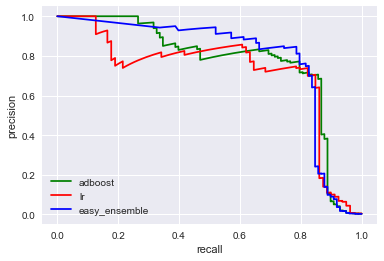

In [339]:
plt.plot(adboost_recall, adboost_precision, 'g', label='adboost')
plt.plot(lr_recall, lr_precision, 'r', label='lr')
plt.plot(easy_recall, easy_precision, 'b', label='easy_ensemble')
plt.legend(loc='lower left')
plt.xlabel('recall')
plt.ylabel('precision')

#### 特征清洗和降维分析

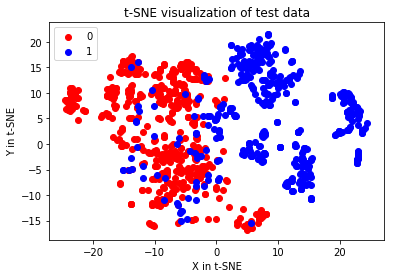

In [12]:
new_X = us_X.copy()
new_X['V1_'] = new_X.V1.map(lambda x: 1 if x < -3 else 0)
new_X['V2_'] = new_X.V2.map(lambda x: 1 if x > 2.5 else 0)
new_X['V3_'] = new_X.V3.map(lambda x: 1 if x < -4 else 0)
new_X['V4_'] = new_X.V4.map(lambda x: 1 if x > 2.5 else 0)
new_X['V5_'] = new_X.V5.map(lambda x: 1 if x < -4.5 else 0)
new_X['V6_'] = new_X.V6.map(lambda x: 1 if x < -2.5 else 0)
new_X['V7_'] = new_X.V7.map(lambda x: 1 if x < -3 else 0)
new_X['V9_'] = new_X.V9.map(lambda x: 1 if x < -2 else 0)
new_X['V10_'] = new_X.V10.map(lambda x: 1 if x < -2.5 else 0)
new_X['V11_'] = new_X.V11.map(lambda x: 1 if x > 2 else 0)
new_X['V12_'] = new_X.V12.map(lambda x: 1 if x < -2 else 0)
new_X['V14_'] = new_X.V14.map(lambda x: 1 if x < -2.5 else 0)
new_X['V16_'] = new_X.V16.map(lambda x: 1 if x < -2 else 0)
new_X['V17_'] = new_X.V17.map(lambda x: 1 if x < -2 else 0)
new_X['V18_'] = new_X.V18.map(lambda x: 1 if x < -2 else 0)
new_X['V19_'] = new_X.V19.map(lambda x: 1 if x > 1.5 else 0)
new_X['V21_'] = new_X.V21.map(lambda x: 1 if x > 0.6 else 0)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=10)
for train_index, test_index in sss.split(new_X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    plt.figure()
    tsne = TSNE(n_components=2, random_state=0)
    x_test_2d = tsne.fit_transform(X_train)

    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x = x_test_2d[y_train==cl,0], 
                    y = x_test_2d[y_train==cl,1], 
                    c = color_map[idx], 
                    label = cl)
    plt.xlabel('X in t-SNE')
    plt.ylabel('Y in t-SNE')
    plt.legend(loc='upper left')
    plt.title('t-SNE visualization of test data')
    plt.show()


#### 提升运行效率
1. 使用GBDT可以提升速度

##### GBDT

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    lr = GradientBoostingClassifier(n_estimators=50, max_depth=5)
    lr.fit(X_train, y_train)
    y_predict = lr.predict(X_test)
    print metrics.roc_auc_score(y_test, y_predict)
    print "precision:", metrics.precision_score(y_test, y_predict)
    print "recall:", metrics.precision_score(y_test, y_predict)

0.816264980246
precision: 0.898550724638
recall: 0.898550724638
